In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from scipy.stats import entropy


In [2]:
data = pd.read_csv('/Users/sgsfile/Desktop/self-study/data/housing.csv.zip')
# Drop the longitude and latitude 
data = data.drop(columns=['longitude', 'latitude'])


In [3]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [5]:
data.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# Cap every numeric column at its 95th percentile
numeric_columns = data.select_dtypes(include=["number"]).columns  # Select only numeric columns
for column in numeric_columns:
    upper_limit = data[column].quantile(0.95)
    data[column] = data[column].clip(upper=upper_limit)

# Check the new statistics
data.describe()



,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2470.583934,508.230549,1345.383188,472.793653,3.771414,206356.924225
std,12.585558,1468.166469,300.972793,785.827053,274.663689,1.587511,114142.497683
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,6213.200000,1275.400000,3288.000000,1162.000000,7.300305,489810.000000


In [7]:
#check missing values and fill
data.isnull().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)

In [9]:
data.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

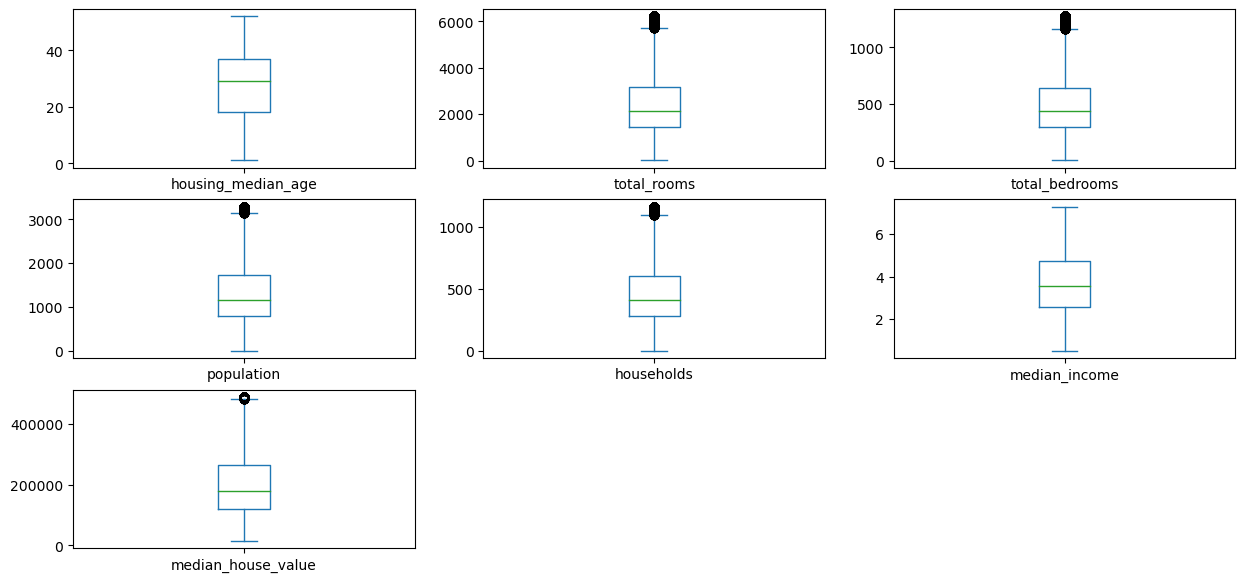

In [10]:
#box plot
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()
# find the formula for the box plot quntile 

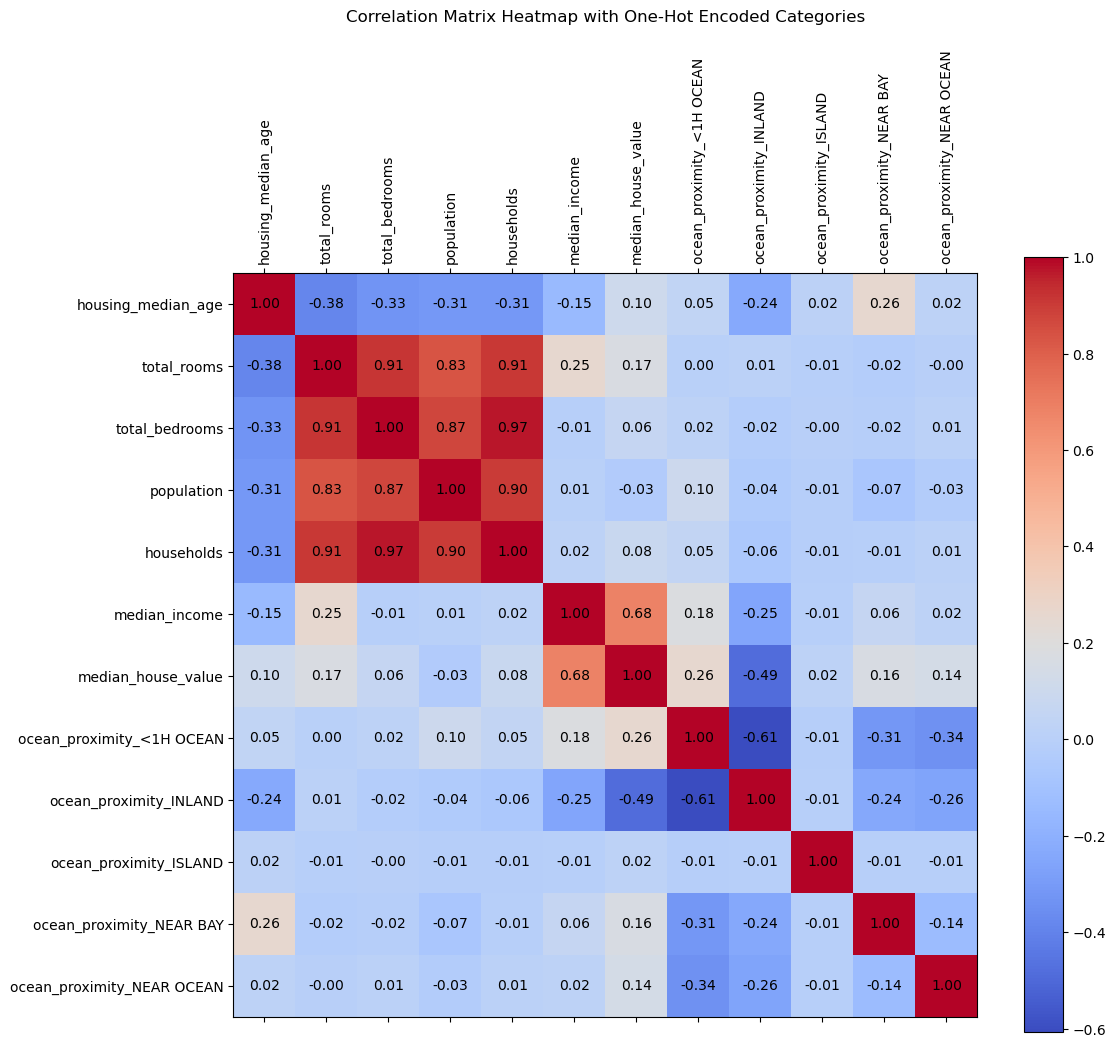

In [11]:
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix='ocean_proximity')

# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)  # Ensure only numeric columns are included

# Plot the heatmap
plt.figure(figsize=(12, 10))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)

# Annotate each cell with the correlation value
for (i, j), value in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black')

plt.title("Correlation Matrix Heatmap with One-Hot Encoded Categories", pad=20)
plt.show()



In [12]:
#infromation theory analysis

# Function to calculate entropy for a variable
def calculate_entropy(column):
    # Discretize continuous data into bins (if needed)
    value_counts = column.value_counts(normalize=True)  # Get probabilities
    return entropy(value_counts, base=2)  # Base-2 for bits

# Calculate entropy for each column in the dataset
entropy_values = {col: calculate_entropy(data[col]) for col in data.columns if data[col].dtype != 'object'}

top_entropy = sorted(entropy_values.items(), key=lambda x: x[1], reverse=True)[:13]

top_entropy = {k: v for k, v in top_entropy}

# Display the top 9 entropy values
print("Top Entropy Values:")
for variable, entropy_val in top_entropy.items():
    print(f"{variable}: {entropy_val}")



Top Entropy Values:
median_income: 12.713654595800767
total_rooms: 11.614914000558446
median_house_value: 11.076012488864377
population: 10.891267416096824
total_bedrooms: 9.609136048154854
households: 9.525681259826959
housing_median_age: 5.447660395509785
ocean_proximity_<1H OCEAN: 0.9904842001958581
ocean_proximity_INLAND: 0.9015243330828411
ocean_proximity_NEAR OCEAN: 0.5540802463728743
ocean_proximity_NEAR BAY: 0.5027736480783871
ocean_proximity_ISLAND: 0.003259144267723053


In [13]:

# Define the target variable
target_variable = 'median_house_value'  # Replace with your target column

# Perform Mutual Information Analysis
if data[target_variable].dtype == 'object':
    # For categorical target
    mi = mutual_info_classif(data.drop(columns=[target_variable]), data[target_variable])
else:
    # For continuous target
    mi = mutual_info_regression(data.drop(columns=[target_variable]), data[target_variable])

# Map mutual information scores to feature names
mi_scores = pd.Series(mi, index=data.drop(columns=target_variable).columns).sort_values(ascending=False)

# Display mutual information scores
print("Mutual Information Scores:")
print(mi_scores)

Mutual Information Scores:
median_income                 0.376599
ocean_proximity_INLAND        0.199096
ocean_proximity_<1H OCEAN     0.097213
total_rooms                   0.039737
housing_median_age            0.032276
households                    0.029246
total_bedrooms                0.022948
ocean_proximity_NEAR BAY      0.020117
population                    0.020016
ocean_proximity_NEAR OCEAN    0.015804
ocean_proximity_ISLAND        0.001003
dtype: float64


In [14]:
# Feature Engineering: Ensure all derived features are created
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['income_age_interaction'] = data['median_income'] * data['housing_median_age']

# Updated selected features for the model
features = ['median_income', 'ocean_proximity_INLAND', 'ocean_proximity_<1H OCEAN', 
            'rooms_per_household', 'housing_median_age', 'income_age_interaction']
X = data[features]
y = data['median_house_value']

# Initialize the Linear Regression model
model = LinearRegression()

# Perform k-fold cross-validation
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Evaluate the model using cross_val_score with R² and MSE
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Fit the model on the entire dataset to get coefficients
model.fit(X, y)
r2_full_dataset = model.score(X, y)
coefficients = model.coef_
intercept = model.intercept_

# Print k-fold results
print("Updated Model with Interaction Term - k-Fold Cross-Validation Results")
print(f"R² Scores for each fold: {r2_scores}")
print(f"Average R² Score: {np.mean(r2_scores):.2f}")
print(f"MSE Scores for each fold: {mse_scores}")
print(f"Average MSE Score: {np.mean(mse_scores):.2f}")
print(f"Average RMSE Score: {np.sqrt(np.mean(mse_scores)):.2f}")

# Print model statistics for the full dataset
print("\nLinear Regression Model Statistics (Full Dataset):")
print(f"R² Score: {r2_full_dataset:.2f}")
print(f"Intercept: {intercept:.2f}")
print("\nFeature Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.2f}")


Updated Model with Interaction Term - k-Fold Cross-Validation Results
R² Scores for each fold: [0.57146806 0.58476932 0.62376234 0.58890908 0.59937749 0.57911844
 0.59728607 0.62971059 0.59122081 0.57435316]
Average R² Score: 0.59
MSE Scores for each fold: [5.59822056e+09 5.23585182e+09 4.84608623e+09 5.67662832e+09
 4.99268970e+09 5.47077311e+09 5.30182670e+09 4.78680976e+09
 5.35199399e+09 5.63349545e+09]
Average MSE Score: 5289437563.55
Average RMSE Score: 72728.52

Linear Regression Model Statistics (Full Dataset):
R² Score: 0.59
Intercept: 88941.47

Feature Coefficients:
median_income: 31810.61
ocean_proximity_INLAND: -85629.99
ocean_proximity_<1H OCEAN: -15333.01
rooms_per_household: 561.54
housing_median_age: -669.60
income_age_interaction: 452.53


In [15]:


# Define the features and target variable
features = ['median_income', 'ocean_proximity_INLAND', 'ocean_proximity_<1H OCEAN', 
            'rooms_per_household', 'housing_median_age', 'income_age_interaction']
X = data[features]
y = data['median_house_value']

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Evaluate the model using cross_val_score with R² and MSE
r2_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')
mse_scores = -cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Fit the model on the entire dataset to get feature importances
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_

# Print the k-fold results
print("Random Forest Model – k-Fold Cross-Validation Results")
print(f"R² Scores for each fold: {r2_scores}")
print(f"Average R² Score: {np.mean(r2_scores):.2f}")
print(f"MSE Scores for each fold: {mse_scores}")
print(f"Average MSE Score: {np.mean(mse_scores):.2f}")
print(f"Average RMSE Score: {np.sqrt(np.mean(mse_scores)):.2f}")

# Print feature importances
print("\nFeature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.2f}")


Random Forest Model – k-Fold Cross-Validation Results
R² Scores for each fold: [0.59552701 0.60004732 0.61793157 0.61506017 0.61473    0.59964511
 0.62773058 0.64696749 0.61051611 0.60307756]
Average R² Score: 0.61
MSE Scores for each fold: [5.28392131e+09 5.04320391e+09 4.92118885e+09 5.31551596e+09
 4.80136167e+09 5.20396002e+09 4.90101729e+09 4.56372622e+09
 5.09936779e+09 5.25332402e+09]
Average MSE Score: 5038658703.64
Average RMSE Score: 70983.51

Feature Importances:
median_income: 0.54
ocean_proximity_INLAND: 0.14
ocean_proximity_<1H OCEAN: 0.01
rooms_per_household: 0.14
housing_median_age: 0.04
income_age_interaction: 0.13
